## Import data

In [1]:
import geopandas as gpd
import numpy as np
import scipy.stats as sps
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

D:\GIS\anaconda3\envs\sds2020\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


<AxesSubplot:>

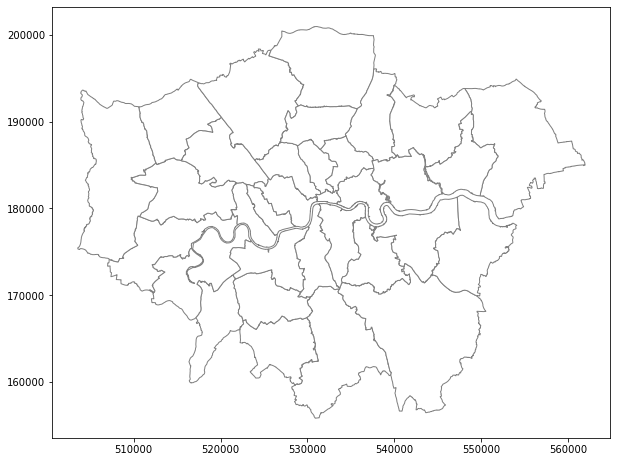

In [2]:
wards=gpd.read_file('Boroughs.gpkg')
wards.plot(facecolor="white",edgecolor="gray",figsize=(10,8))

In [41]:
wards.head()

,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,geometry
0,Kingston upon Thames,E09000021,3726.117,0.000,F,"MULTIPOLYGON (((516401.600 160201.800, 516407...."
1,Croydon,E09000008,8649.441,0.000,F,"MULTIPOLYGON (((535009.200 159504.700, 535005...."
2,Bromley,E09000006,15013.487,0.000,F,"MULTIPOLYGON (((540373.600 157530.400, 540361...."
3,Hounslow,E09000018,5658.541,60.755,F,"MULTIPOLYGON (((521975.800 178100.000, 521967...."
4,Ealing,E09000009,5554.428,0.000,F,"MULTIPOLYGON (((510253.500 182881.600, 510249...."


In [95]:
df=pd.read_csv('aggregated-borough-base.csv')
df2=pd.read_csv('aggregated-borough-base-1.csv')

In [5]:
df.head()

,boroughs,Accomodation Services,Comparison - Bulky,Comparison - Not Bulky,Convenience,DIY,Gardening,Leisure,On Licence,Other Goods and Services,Other Spending,Restaurants and Caffees,Takeaway / Snack Spending,sum
0,Barking and Dagenham,23.779556,111.675459,188.552256,214.176975,17.174369,3.300712,53.810415,30.773543,161.402105,724.799823,48.957910,22.380759,1600.783881
1,Barnet,84.047844,392.752104,562.894573,464.617507,37.737068,9.887658,135.591797,108.767798,444.144858,2406.720320,173.039679,79.103853,4899.305060
2,Bexley,27.056765,130.678908,215.194247,205.247022,16.972540,4.089865,56.950481,35.014638,196.077386,758.469128,55.705105,25.465191,1726.921275
3,Brent,62.614910,269.309611,443.659280,433.173417,33.933520,7.289286,110.739101,81.031060,354.931701,1871.990598,128.913050,58.931680,3856.517216
4,Bromley,70.933113,342.252027,504.895327,435.417503,35.615504,9.522526,127.063812,91.795794,431.766735,1994.219973,146.038762,66.760577,4256.281652


## Explory of data

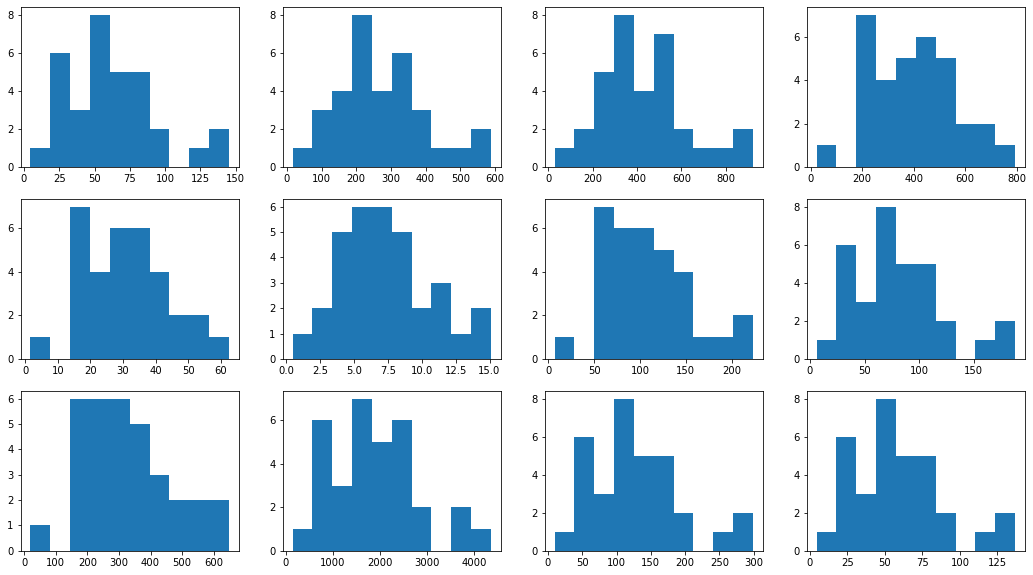

In [81]:
f,ax=plt.subplots(3,4,figsize=(18,10))
a,b,c=0,0,0
for i in list(df2.columns[0:4]):
    data = list(df2[i])
    ax[0,a].hist(data,bins=10)
    a=a+1
for i in list(df2.columns[4:8]):
    data = list(df2[i])
    ax[1,b].hist(data,bins=10)
    b=b+1
for i in list(df2.columns[8:12]):
    data = list(df2[i])
    ax[2,c].hist(data,bins=10)
    c=c+1
#plt.savefig(output_filename)

## Standardisation

In [103]:
df_stand=df2.copy()

In [119]:
for i in range(0,32):
    for j in df2.columns:
        df_stand[j][i]=(df2[j][i]-min(list(df2.iloc[i,:])))/(max(list(df2.iloc[i,:]))-min(list(df2.iloc[i,:])))

In [120]:
df_stand.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12
0,0.028384,0.150208,0.256759,0.292275,0.019229,0.0,0.070007,0.038077,0.219129,1.0,0.063281,0.026445
1,0.030941,0.159738,0.230724,0.189721,0.011619,0.0,0.052446,0.041255,0.181180,1.0,0.068070,0.028878
2,0.030445,0.167806,0.279839,0.266653,0.017077,0.0,0.070072,0.040994,0.254497,1.0,0.068421,0.028335
3,0.029670,0.140516,0.234016,0.228393,0.014289,0.0,0.055478,0.039546,0.186433,1.0,0.065224,0.027695
4,0.030942,0.167647,0.249596,0.214589,0.013147,0.0,0.059224,0.041454,0.212750,1.0,0.068784,0.028840


## Factor Analysis

In [6]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.decomposition import FactorAnalysis, PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

In [117]:
X = df2.values
X=X/np.reshape(np.sum(X,axis=1),[-1,1])
feature_names = df.columns[1:13]

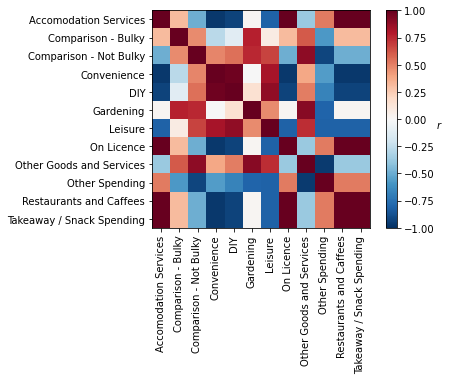

In [122]:
ax = plt.axes()

im = ax.imshow(np.corrcoef(X.T), cmap="RdBu_r", vmin=-1, vmax=1)

ax.set_xticks([0, 1, 2, 3,4,5,6,7,8,9,10,11])
ax.set_xticklabels(list(feature_names), rotation=90)
ax.set_yticks([0, 1, 2, 3,4,5,6,7,8,9,10,11])
ax.set_yticklabels(list(feature_names))

plt.colorbar(im).ax.set_ylabel("$r$", rotation=0)

plt.savefig('correlation matrix.png',dpi=300,bbox_inches='tight')

In [9]:
pca = PCA(n_components=4, svd_solver='arpack')
pca.fit(X)
print(pca.explained_variance_ratio_) # The larger the proportion, the more important the principal component.

[0.85354307 0.12991198 0.01159975 0.00401151]




 PCA :

[[-0.01781688 -0.06635302]
 [ 0.12561315 -0.45774296]
 [ 0.15853498 -0.02137632]
 [ 0.23898502  0.83515337]
 [ 0.02250872  0.05686818]
 [ 0.00560473 -0.01028583]
 [ 0.05058722  0.06686405]
 [-0.02305714 -0.08586862]
 [ 0.3657688  -0.20640722]
 [-0.87327796  0.08820744]
 [-0.03668182 -0.13660917]
 [-0.01676883 -0.06244991]]


 Unrotated FA :

[[ 9.25170197e-04  1.09814701e-08]
 [ 2.13920351e-03  5.30582872e-03]
 [-2.42464591e-03  3.80903874e-03]
 [-1.12082988e-02  3.34731130e-04]
 [-8.57757456e-04  1.69044480e-04]
 [ 4.32784897e-06  2.02360109e-04]
 [-1.41662416e-03  8.33169157e-04]
 [ 1.19727908e-03  1.42122423e-08]
 [-4.04400728e-03  1.01279020e-02]
 [ 1.29098424e-02 -2.07821324e-02]
 [ 1.90476217e-03  2.26098016e-08]
 [ 8.70748420e-04  1.03356104e-08]]


 Varimax FA :

[[ 0.00079553 -0.00047231]
 [ 0.00454816  0.0034702 ]
 [-0.00014028  0.00451309]
 [-0.00946675  0.00600988]
 [-0.00065126  0.00058326]
 [ 0.00010703  0.00017179]
 [-0.00079276  0.00143963]
 [ 0.00102951 -0.00

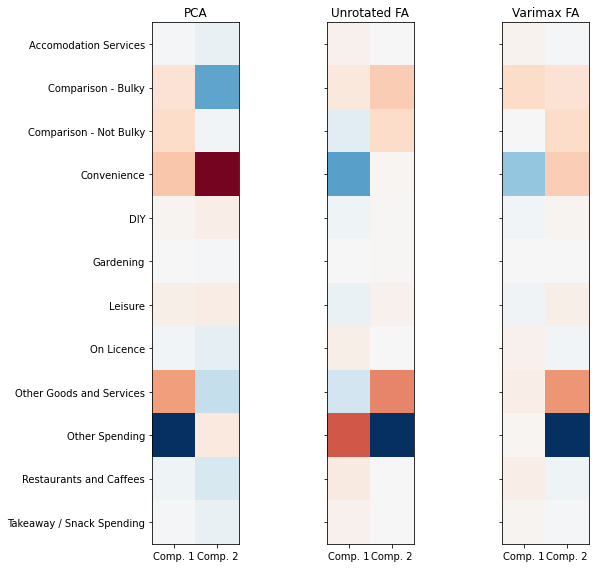

In [123]:
n_comps = 2

methods = [('PCA', PCA()),
           ('Unrotated FA', FactorAnalysis()),
           ('Varimax FA', FactorAnalysis(rotation='varimax'))]
fig, axes = plt.subplots(ncols=len(methods), figsize=(10, 8))

for ax, (method, fa) in zip(axes, methods):
    fa.set_params(n_components=n_comps)
    fa.fit(X)

    components = fa.components_.T
    print("\n\n %s :\n" % method)
    print(components)

    vmax = np.abs(components).max()
    ax.imshow(components, cmap="RdBu_r", vmax=vmax, vmin=-vmax)
    ax.set_yticks(np.arange(len(feature_names)))
    if ax.is_first_col():
        ax.set_yticklabels(feature_names)
    else:
        ax.set_yticklabels([])
    ax.set_title(str(method))
    ax.set_xticks([0, 1])
    ax.set_xticklabels(["Comp. 1", "Comp. 2"])
plt.tight_layout()
plt.show()

In [11]:
transformer = FactorAnalysis(n_components=2, rotation='varimax')
X_transformed = transformer.fit_transform(X)

X_transformed

array([[-1.22540499,  1.33642867],
       [ 0.8629654 , -0.01598436],
       [ 0.31588036,  2.2118083 ],
       [-0.17352233,  0.18382717],
       [ 0.86485669,  1.02369123],
       [ 0.87023357, -1.20890916],
       [ 1.077071  , -1.3867234 ],
       [-0.00418705,  0.67646697],
       [ 0.06446143, -0.0623846 ],
       [-0.02404339,  0.56908362],
       [-1.04310961,  0.27624741],
       [-1.50708294, -0.91430473],
       [ 0.77190964, -1.28372456],
       [-0.64104217, -0.62254763],
       [ 0.86574755,  1.05113354],
       [ 0.43693815,  2.13688304],
       [ 0.39364016,  1.41072561],
       [-0.20610332,  0.64808274],
       [-0.13657393, -1.28360013],
       [ 2.23860625, -0.86635956],
       [ 0.56097166,  0.10969873],
       [-0.56760357, -0.99548399],
       [-1.48644345, -0.28297107],
       [ 0.10366253, -0.02505245],
       [-2.29629027, -0.28086272],
       [ 0.14698975,  0.90228399],
       [ 1.21979834, -0.28238832],
       [-1.21854736, -0.94354462],
       [ 0.31557482,

In [12]:
#translate the tpye and merge it to the orignal dataframe, and save it to the local directory
X_trans_df=pd.DataFrame(X_transformed)
X_trans_df.columns = ['Comp1','Comp2']
X_factor=pd.merge(df,X_trans_df,left_on=df.index, right_on=X_trans_df.index)   #.to_excel('result_fac.xls',index=False)

## Cluster Analysis

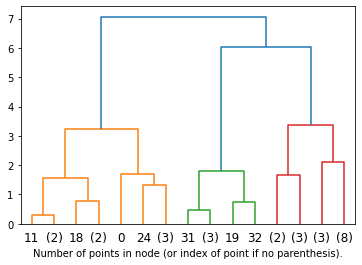

In [131]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X_transformed)
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.savefig('cluster.png',dpi=300)
plt.show()

In [14]:
clustering = AgglomerativeClustering(n_clusters=3).fit(X_transformed)
clustering.labels_

array([1, 0, 0, 0, 0, 2, 2, 0, 0, 0, 1, 1, 2, 1, 0, 0, 0, 0, 1, 2, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 2, 2], dtype=int64)

In [15]:
X_cluster=pd.DataFrame(clustering.labels_)
X_cluster.columns=['Cluster']
X_final=pd.merge(X_factor,X_cluster,right_on=X_cluster.index, left_on='key_0') 

In [16]:
X_final.head()

,key_0,boroughs,Accomodation Services,Comparison - Bulky,Comparison - Not Bulky,Convenience,DIY,Gardening,Leisure,On Licence,Other Goods and Services,Other Spending,Restaurants and Caffees,Takeaway / Snack Spending,sum,Comp1,Comp2,Cluster
0,0,Barking and Dagenham,23.779556,111.675459,188.552256,214.176975,17.174369,3.300712,53.810415,30.773543,161.402105,724.799823,48.957910,22.380759,1600.783881,-1.225405,1.336429,1
1,1,Barnet,84.047844,392.752104,562.894573,464.617507,37.737068,9.887658,135.591797,108.767798,444.144858,2406.720320,173.039679,79.103853,4899.305060,0.862965,-0.015984,0
2,2,Bexley,27.056765,130.678908,215.194247,205.247022,16.972540,4.089865,56.950481,35.014638,196.077386,758.469128,55.705105,25.465191,1726.921275,0.315880,2.211808,0
3,3,Brent,62.614910,269.309611,443.659280,433.173417,33.933520,7.289286,110.739101,81.031060,354.931701,1871.990598,128.913050,58.931680,3856.517216,-0.173522,0.183827,0
4,4,Bromley,70.933113,342.252027,504.895327,435.417503,35.615504,9.522526,127.063812,91.795794,431.766735,1994.219973,146.038762,66.760577,4256.281652,0.864857,1.023691,0


In [17]:
X_final.to_excel('result_fac.xls',index=False)

<ipython-input-17-1630a042802e>:1: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  X_final.to_excel('result_fac.xls',index=False)


## Visualize the result of clustering in the map

In [18]:
wards_merge = wards.merge(X_final, how = 'left',left_on='NAME',right_on='boroughs')

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from geopandas import GeoDataFrame
from shapely.geometry import Point

In [21]:
za=wards_merge
za["center"] = za["geometry"].centroid
za_points = za.copy()
za_points.set_geometry("center", inplace = True)

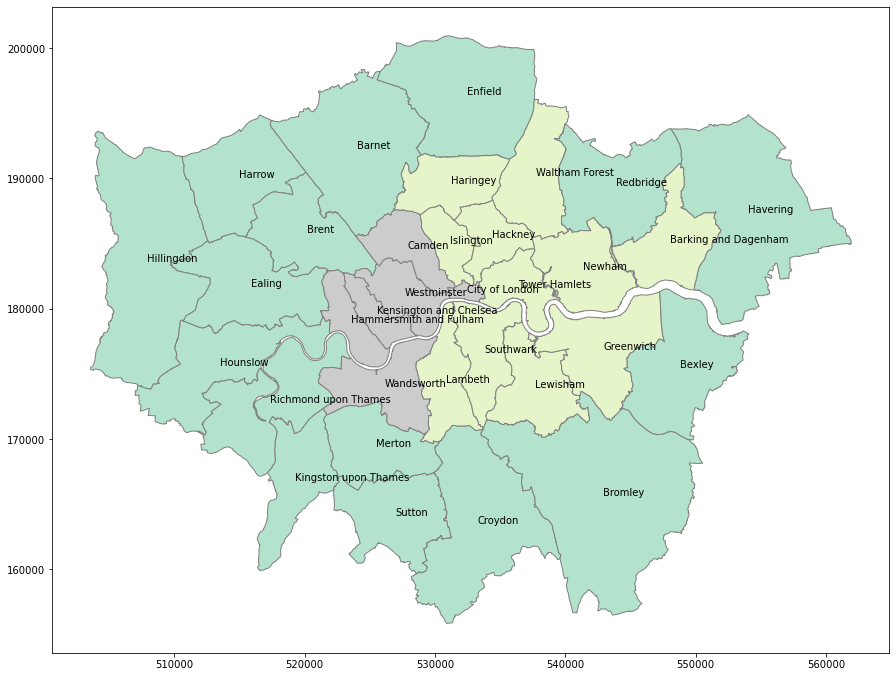

In [132]:
f, ax = plt.subplots(figsize=(15, 12))
za.plot(ax=ax,column='Cluster',cmap='Pastel2',legend=False,edgecolor="gray")
texts = []

for x, y, label in zip(za_points.geometry.x, za_points.geometry.y, za_points["boroughs"]):
    texts.append(plt.text(x, y, label, fontsize = 10))
    
f.savefig('CLuster Map.png',dpi=300)